GSE78220
phs000452
PRJEB23709
GSE91061
GSE100797


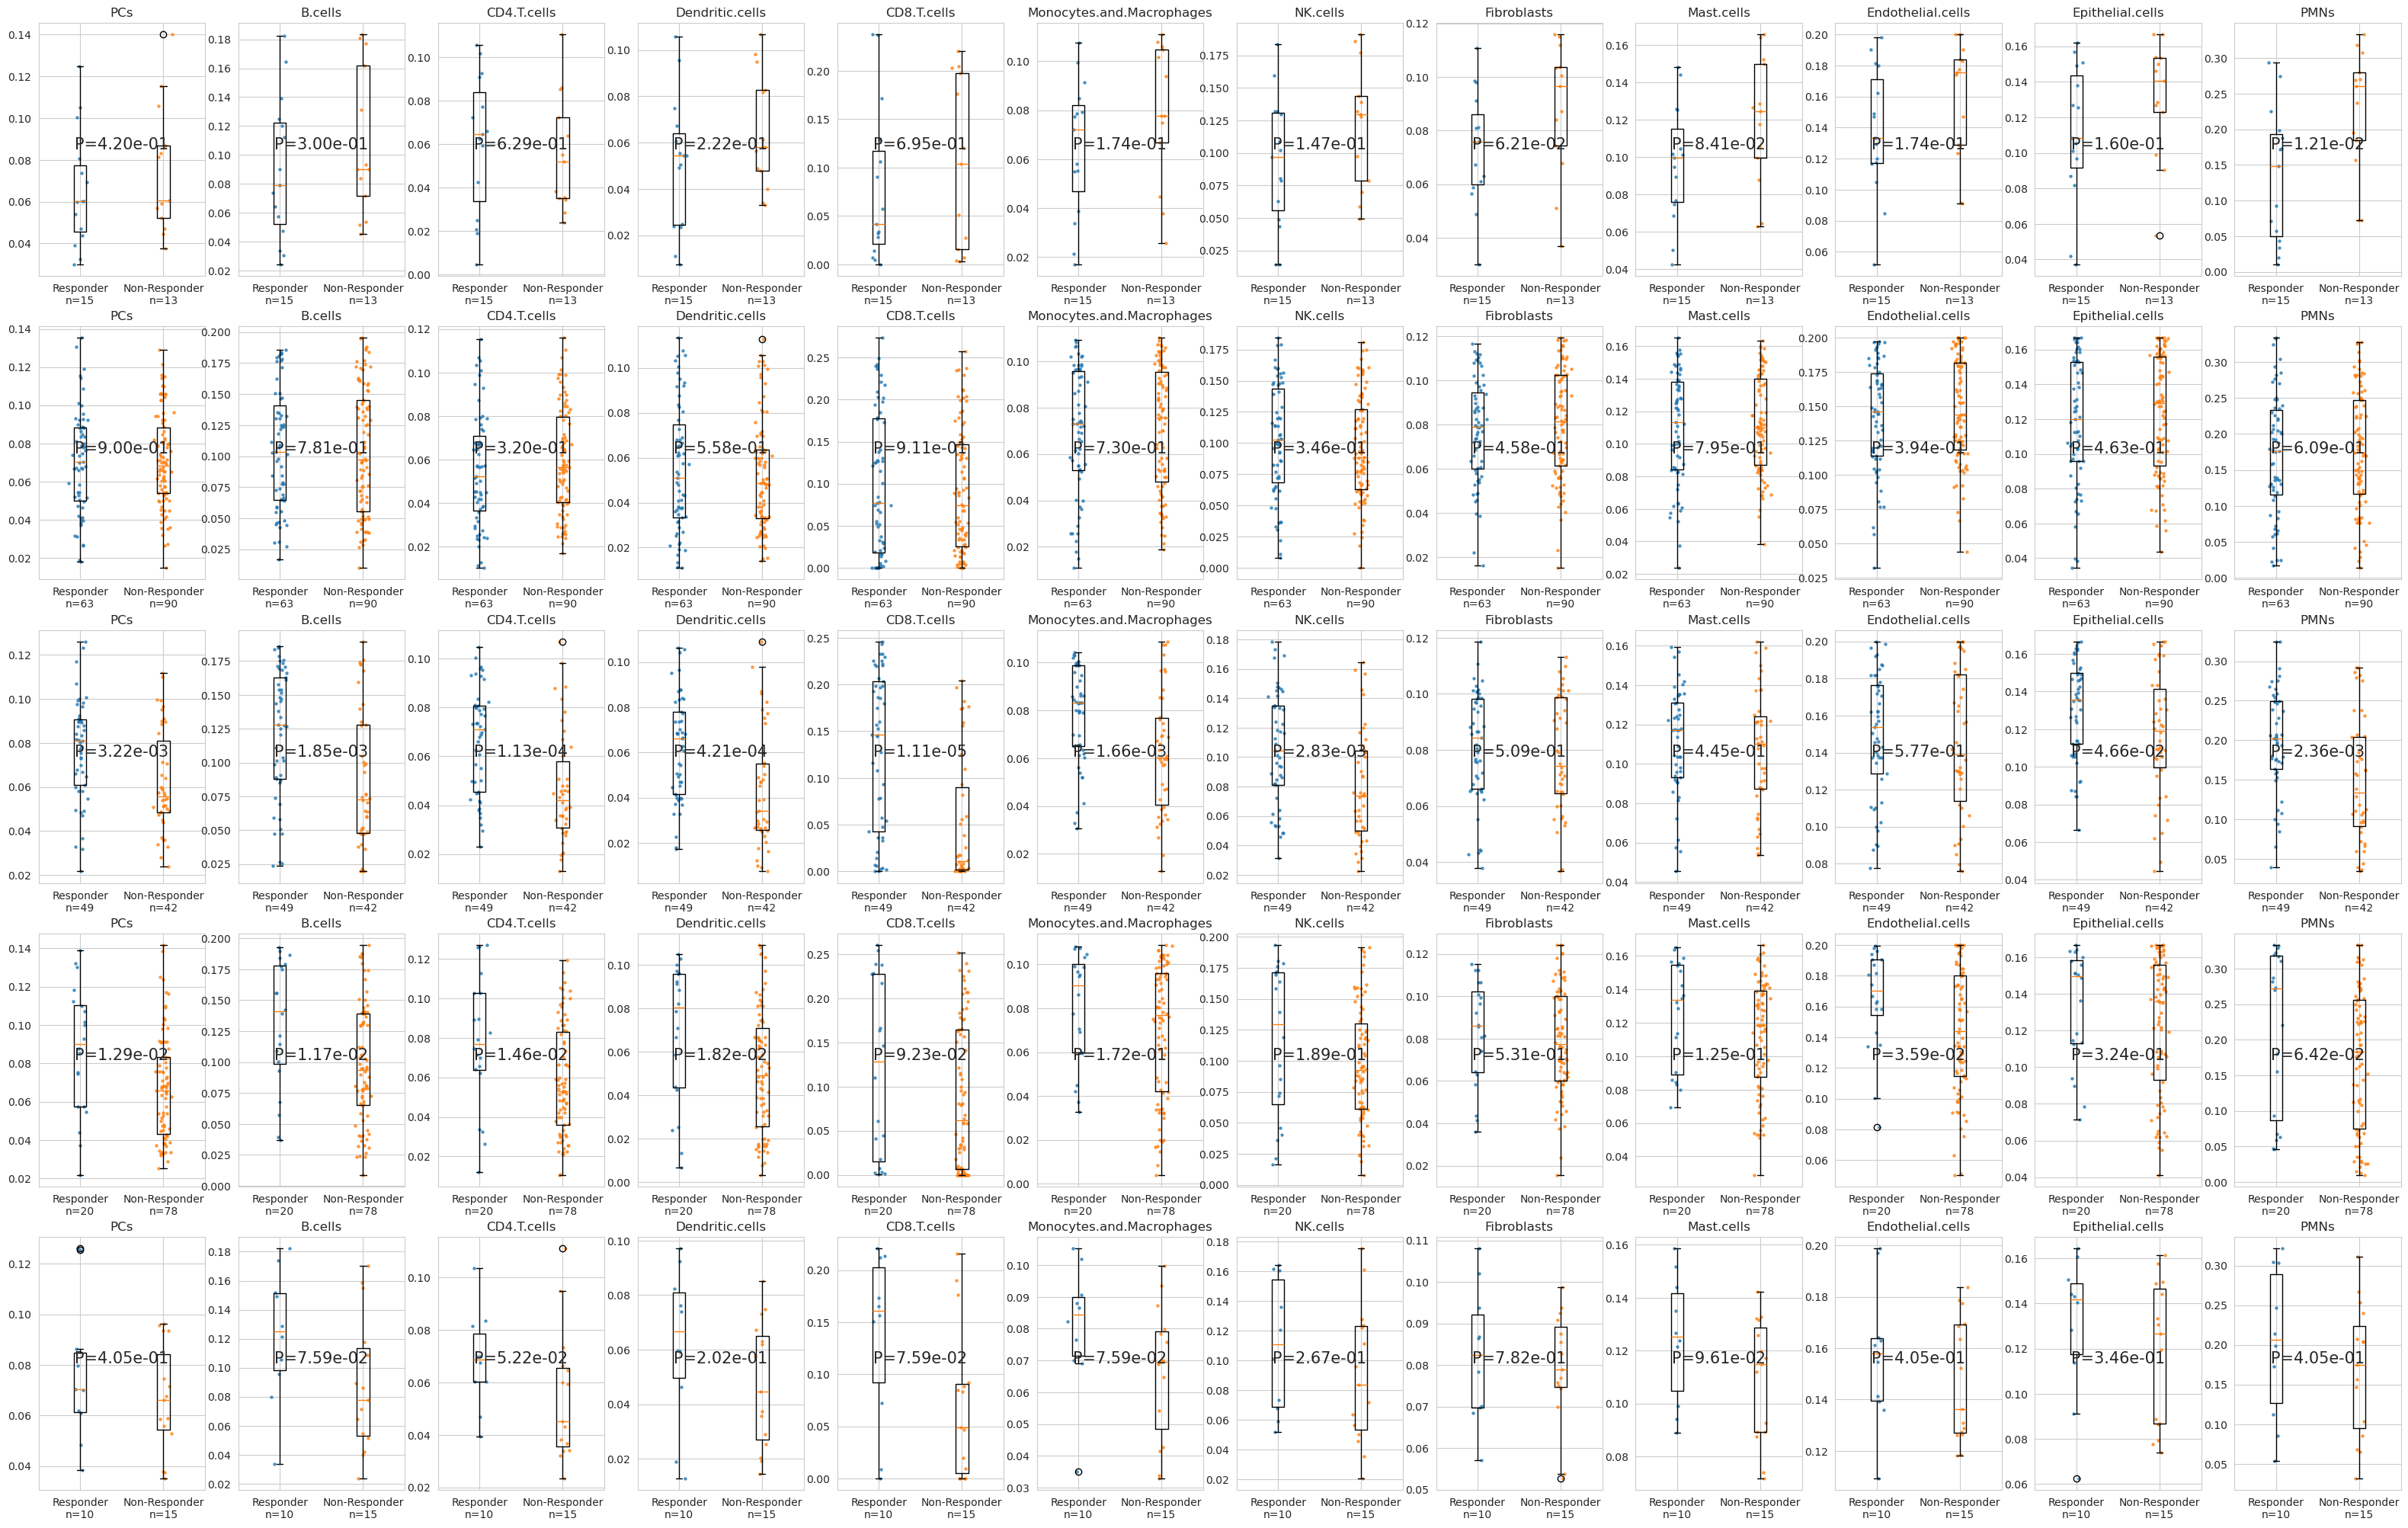

In [91]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import os
from scipy.stats import ranksums
from sklearn import metrics

gen_path = f'/sibcb1/bioinformatics/hongyuyang/dataset/Tres/test/deconvolution/'
dataset_list = os.listdir(gen_path)

colnum = 12
fig = plt.figure(figsize=(40, 5 * len(dataset_list)))
gs = gridspec.GridSpec(nrows=int(len(dataset_list)), ncols=colnum, width_ratios=[1] * colnum)
row = 0
for dataset in dataset_list:
    response_path = f'/sibcb1/bioinformatics/hongyuyang/dataset/Tres/5.Analysis_data/{dataset}/{dataset}.Response.tsv'
    response_df = pd.read_csv(response_path, index_col=0, header=0, delimiter='\t')
    response_df.set_index('sample_id', inplace=True)
    
    print(dataset)
    dataset_path = os.path.join(gen_path, dataset)
    celltype_list = os.listdir(dataset_path)
    col = 0
    for celltype in celltype_list:
        abundance_path = os.path.join(dataset_path, celltype, f'{celltype}_Cell_State_Abundance.txt')
        abundance_df = pd.read_csv(abundance_path, index_col=0, header=0, delimiter='\t')
        
        response_abundance = abundance_df.loc[response_df[response_df['response_NR'] == 'R'].index].mean(axis=1)
        nonresponse_abundance = abundance_df.loc[response_df[response_df['response_NR'] == 'N'].index].mean(axis=1)
        # response_abundance = abundance_df.loc[response_df[response_df['response'].isin(['PR', 'CR'])].index].mean(axis=1)
        # nonresponse_abundance = abundance_df.loc[response_df[response_df['response'].isin(['PD'])].index].mean(axis=1)
        abundance_data = [np.array(response_abundance).ravel(), np.array(nonresponse_abundance).ravel()]
        p_value = ranksums(response_abundance, nonresponse_abundance).pvalue
        p_value_format = format(p_value, '0.2e')
        
        ax = fig.add_subplot(gs[row, col])
        ax.boxplot(abundance_data)
        # add scatter
        for i in range(len(abundance_data)):
            y = abundance_data[i]
            x = np.random.normal(i + 1, 0.04, size=len(y))
            ax.scatter(x, y, alpha=0.7, s=5)
        y_mean = (max(max(row) for row in abundance_data) + min(min(row) for row in abundance_data)) / 2
        ax.text(1.5, y_mean, f'P={p_value_format}', ha='center', fontsize=15)
        ax.set_xticks([1, 2])
        ax.set_xticklabels([f'Responder\nn={len(response_abundance)}', f'Non-Responder\nn={len(nonresponse_abundance)}'])
        ax.set_title(celltype)
        col += 1
    row += 1


In [89]:
abundance_df

,S01,S02,S03,S04,S05,S06
ID,,,,,,
SRR3184279,1.019018e-01,1.091212e-01,8.683758e-02,3.489280e-02,2.341740e-01,1.248437e-01
SRR3184280,1.115693e-14,1.136136e-01,6.089865e-02,3.640989e-01,1.475771e-02,4.922231e-02
SRR3184281,7.107620e-03,2.775424e-02,6.239688e-02,6.473320e-02,1.863288e-01,1.336832e-02
SRR3184282,2.415817e-02,1.097571e-03,5.433549e-03,5.633329e-03,1.179715e-14,1.972377e-01
SRR3184283,6.357227e-04,6.334363e-02,4.233134e-10,3.700529e-02,2.539619e-03,1.587742e-01
SRR3184284,2.782067e-03,1.431604e-14,1.004920e-01,3.504490e-02,1.431604e-14,1.747851e-01
SRR3184285,2.759517e-02,1.226272e-14,1.758492e-02,1.245395e-01,1.072241e-02,1.436947e-01
SRR3184286,9.278832e-02,3.138152e-02,5.398511e-02,3.247046e-02,8.689957e-02,6.361585e-02
SRR3184287,9.772308e-15,9.772308e-15,5.597655e-02,6.763346e-02,9.535066e-02,6.434517e-02
